# Chapter 6 - Linear Model Selection and Regularization

- [Lab 2: Ridge Regression](#6.6.1-Ridge-Regression)
- [Lab 2: The Lasso](#6.6.2-The-Lasso)
- [Lab 3: Principal Components Regression](#6.7.1-Principal-Components-Regression)
- [Lab 3: Partial Least Squares](#6.7.2-Partial-Least-Squares)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('Data/Hitters.csv', index_col=0).dropna()
df.index.name = 'Player'
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
#dummies.info()
print(dummies.head())

                   League_A  League_N  Division_E  Division_W  NewLeague_A  \
Player                                                                       
-Alan Ashby               0         1           0           1            0   
-Alvin Davis              1         0           0           1            1   
-Andre Dawson             0         1           1           0            0   
-Andres Galarraga         0         1           1           0            0   
-Alfredo Griffin          1         0           0           1            1   

                   NewLeague_N  
Player                          
-Alan Ashby                  1  
-Alvin Davis                 0  
-Andre Dawson                1  
-Andres Galarraga            1  
-Alfredo Griffin             0  


In [4]:
y = df.Salary
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
list_numerical=X_train.columns[:16]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [7]:
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 58.62
R squared test set 30.22


In [8]:
# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 86053.51
MSE test set 126212.38


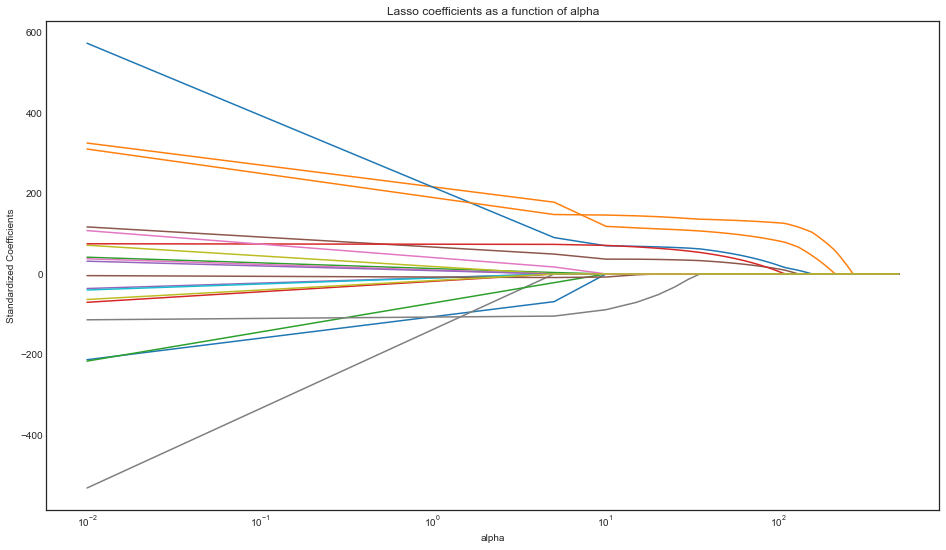

In [9]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(16,9))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.show()

In [10]:
model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(X_train, y_train)
model.alpha_

10.250469583914377

In [11]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 54.5
R squared test set 19.8


In [12]:
print('mean squared error training set:', mean_squared_error(y_train, lasso_best.predict(X_train)))
print('mean squared error test set:', mean_squared_error(y_test, lasso_best.predict(X_test)))

mean squared error training set: 94613.03119763568
mean squared error test set: 145067.03639338588


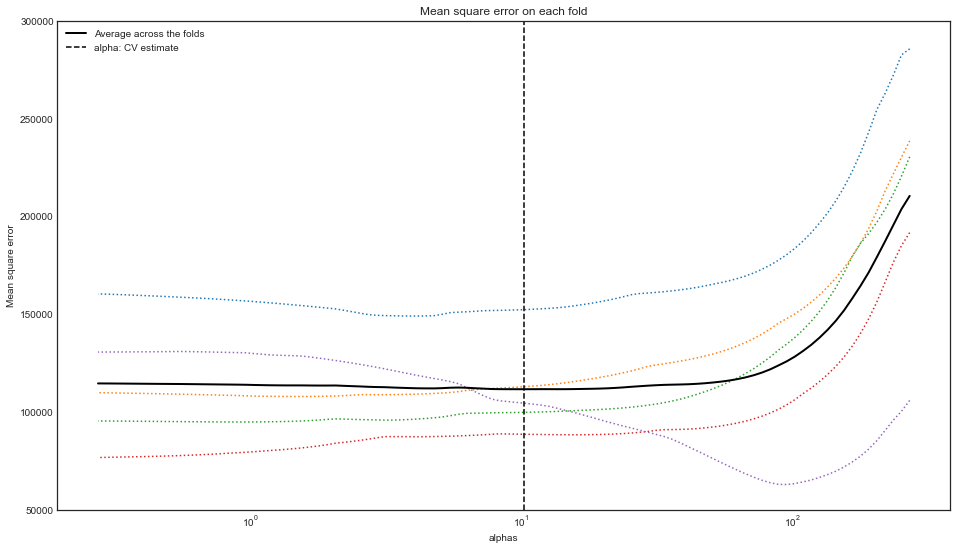

In [13]:
plt.figure(figsize=(16,9))
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),"k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(model.alpha_, linestyle="--", color="k", label="alpha: CV estimate")
plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")
ymin, ymax = 50000, 300000
plt.ylim(ymin, ymax);

# Ridge

In [14]:
reg = Ridge(alpha=1)
reg.fit(X_train, y_train)
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

NameError: name 'Ridge' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
ridge= Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_[0])

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

In [ ]:
from sklearn.linear_model import RidgeCV

# Lasso with 5 fold cross-validation
model = RidgeCV(cv=5,alphas=alphas,scoring='r2')

# Fit model
model.fit(X_train, y_train)

In [ ]:
model.alpha_

In [ ]:
ridge_best = Ridge(alpha=model.alpha_)
ridge_best.fit(X_train, y_train)
print('R squared training set', round(ridge_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge_best.score(X_test, y_test)*100, 2))

In [ ]:
mean_squared_error(y_test, ridge_best.predict(X_test))

In [ ]:
mse=[]
for m in model.alphas:
    mse.append(mean_squared_error(y_test, m.predict(X_test)))

In [ ]:
plt.semilogx(model.alphas,model.r2_path_)
plt.plot(
    model.alphas ,
    mse.mean(axis=-1),"k",
    label="Average across the folds",
    linewidth=2,
)

plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 300000
plt.ylim(ymin, ymax);

In [ ]:
model.score(X_test,y_test)

### 6.6.1 Ridge Regression

### Scikit-learn

The __glmnet__ algorithms in R optimize the objective function using cyclical coordinate descent, while scikit-learn Ridge regression uses linear least squares with L2 regularization. They are rather different implementations, but the general principles are the same.

The __glmnet() function in R__ optimizes:
### $$ \frac{1}{N}|| X\beta-y||^2_2+\lambda\bigg(\frac{1}{2}(1−\alpha)||\beta||^2_2 \ +\ \alpha||\beta||_1\bigg) $$
(See R documentation and https://cran.r-project.org/web/packages/glmnet/vignettes/glmnet_beta.pdf)<BR>
The function supports L1 and L2 regularization. For just Ridge regression we need to use $\alpha = 0 $. This reduces the above cost function to
### $$ \frac{1}{N}|| X\beta-y||^2_2+\frac{1}{2}\lambda ||\beta||^2_2 $$
The __sklearn Ridge()__ function optimizes:
### $$ ||X\beta - y||^2_2 + \alpha ||\beta||^2_2 $$
which is equivalent to optimizing
### $$ \frac{1}{N}||X\beta - y||^2_2 + \frac{\alpha}{N} ||\beta||^2_2 $$

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

The above plot shows that the Ridge coefficients get larger when we decrease alpha.

#### Alpha = 4

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
ridge2 = Ridge(alpha=len(X_)*11498/2)
ridge2.fit(scaler.transform(X_train), y_train)
pred = ridge2.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

In [ ]:
pd.Series(ridge2.coef_.flatten(), index=X.columns)

#### Alpha = $10^{10}$ 
This big penalty shrinks the coefficients to a very large degree and makes the model more biased, resulting in a higher MSE.

In [ ]:
ridge2.set_params(alpha=10**10)
ridge2.fit(scale(X_train), y_train)
pred = ridge2.predict(scale(X_test))
mean_squared_error(y_test, pred)

#### Compute the regularization path using RidgeCV

In [ ]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

In [ ]:
ridgecv.alpha_

In [ ]:
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(scale(X_train), y_train)
mean_squared_error(y_test, ridge2.predict(scale(X_test)))

In [ ]:
pd.Series(ridge2.coef_.flatten(), index=X.columns)

### python-glmnet (update 2016-08-29)
This relatively new module is a wrapper for the fortran library used in the R package `glmnet`. It gives mostly the exact same results as described in the book. However, the `predict()` method does not give you the regression *coefficients* for lambda values not in the lambda_path. It only returns the predicted values.
https://github.com/civisanalytics/python-glmnet

In [ ]:
from glmnet import LogitNet

In [ ]:
grid = 10**np.linspace(10,-2,100)

ridge3 = gln.ElasticNet(alpha=0, lambda_path=grid)
ridge3.fit(X, y)

#### Lambda 11498

In [ ]:
ridge3.lambda_path_[49]

In [ ]:
print('Intercept: {:.3f}'.format(ridge3.intercept_path_[49]))

In [ ]:
pd.Series(np.round(ridge3.coef_path_[:,49], decimals=3), index=X.columns)

In [ ]:
np.sqrt(np.sum(ridge3.coef_path_[:,49]**2))

#### Lambda 705

In [ ]:
ridge3.lambda_path_[59]

In [ ]:
print('Intercept: {:.3f}'.format(ridge3.intercept_path_[59]))

In [ ]:
pd.Series(np.round(ridge3.coef_path_[:,59], decimals=3), index=X.columns)

In [ ]:
np.sqrt(np.sum(ridge3.coef_path_[:,59]**2))

#### Fit model using just the training set.

In [ ]:
ridge4 = gln.ElasticNet(alpha=0, lambda_path=grid, scoring='mean_squared_error', tol=1e-12)
ridge4.fit(X_train, y_train.values.ravel())

In [ ]:
# prediction using lambda = 4
pred = ridge4.predict(X_test, lamb=4)
mean_squared_error(y_test.values.ravel(), pred)

#### Lambda chosen by cross validation

In [ ]:
ridge5 = gln.ElasticNet(alpha=0, scoring='mean_squared_error')
ridge5.fit(X_train, y_train.values.ravel())

In [ ]:
# Lambda with best CV performance
ridge5.lambda_max_

In [ ]:
# Lambda larger than lambda_max_, but with a CV score that is within 1 standard deviation away from lambda_max_ 
ridge5.lambda_best_

In [ ]:
plt.figure(figsize=(15,6))
plt.errorbar(np.log(ridge5.lambda_path_), -ridge5.cv_mean_score_, color='r', linestyle='None', marker='o',
             markersize=5, yerr=ridge5.cv_standard_error_, ecolor='lightgrey', capsize=4)

for ref, txt in zip([ridge5.lambda_best_, ridge5.lambda_max_], ['Lambda best', 'Lambda max']):
    plt.axvline(x=np.log(ref), linestyle='dashed', color='lightgrey')
    plt.text(np.log(ref), .95*plt.gca().get_ylim()[1], txt, ha='center')

plt.xlabel('log(Lambda)')
plt.ylabel('Mean-Squared Error');

In [ ]:
# MSE for lambda with best CV performance
pred = ridge5.predict(X_test, lamb=ridge5.lambda_max_)
mean_squared_error(y_test, pred)

#### Fit model to full data set

In [ ]:
ridge6= gln.ElasticNet(alpha=0, scoring='mean_squared_error', n_splits=10)
ridge6.fit(X, y)

In [ ]:
# These are not really close to the ones in the book.
pd.Series(ridge6.coef_path_[:,ridge6.lambda_max_inx_], index=X.columns)

### 6.6.2 The Lasso

### Scikit-learn



For both __glmnet__ in R and sklearn __Lasso()__ function the standard L1 penalty is:
### $$ \lambda |\beta|_1 $$

In [ ]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())

In [ ]:
lassocv.alpha_

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scale(X_test)))

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

### python-glmnet

In [ ]:
lasso2 = gln.ElasticNet(alpha=1, lambda_path=grid, scoring='mean_squared_error', n_splits=10)
lasso2.fit(X_train, y_train.values.ravel())

In [ ]:
l1_norm = np.sum(np.abs(lasso2.coef_path_), axis=0)

plt.figure(figsize=(10,6))
plt.plot(l1_norm, lasso2.coef_path_.T)
plt.xlabel('L1 norm')
plt.ylabel('Coefficients');

#### Let glmnet() create a grid to use in CV

In [ ]:
lasso3 = gln.ElasticNet(alpha=1, scoring='mean_squared_error', n_splits=10)
lasso3.fit(X_train, y_train.values.ravel())

In [ ]:
plt.figure(figsize=(15,6))
plt.errorbar(np.log(lasso3.lambda_path_), -lasso3.cv_mean_score_, color='r', linestyle='None', marker='o',
             markersize=5, yerr=lasso3.cv_standard_error_, ecolor='lightgrey', capsize=4)

for ref, txt in zip([lasso3.lambda_best_, lasso3.lambda_max_], ['Lambda best', 'Lambda max']):
    plt.axvline(x=np.log(ref), linestyle='dashed', color='lightgrey')
    plt.text(np.log(ref), .95*plt.gca().get_ylim()[1], txt, ha='center')

plt.xlabel('log(Lambda)')
plt.ylabel('Mean-Squared Error');

In [ ]:
pred = lasso3.predict(X_test, lamb=lasso3.lambda_max_)
mean_squared_error(y_test, pred)

#### Fit model on full dataset

In [ ]:
lasso4 = gln.ElasticNet(alpha=1, lambda_path=grid, scoring='mean_squared_error', n_splits=10)
lasso4.fit(X, y)

In [ ]:
# These are not really close to the ones in the book.
pd.Series(lasso4.coef_path_[:,lasso4.lambda_max_inx_], index=X.columns)

# Lab 3

### 6.7.1 Principal Components Regression

Scikit-klearn does not have an implementation of PCA and regression combined like the 'pls' package in R.
https://cran.r-project.org/web/packages/pls/vignettes/pls-manual.pdf

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:5]

The above loadings are the same as in R.

In [ ]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

The above principal components are the same as in R.

In [ ]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

The above plot indicates that the lowest training MSE is reached when doing regression on 18 components.

In [ ]:
regr_test = LinearRegression()
regr_test.fit(X_reduced, y)
regr_test.coef_

#### Fitting PCA with training data

In [ ]:
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

The above plot indicates that the lowest training MSE is reached when doing regression on 6 components.

#### Transform test data with PCA loadings and fit regression on 6 principal components

In [ ]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

### 6.7.2 Partial Least Squares

Scikit-learn PLSRegression gives same results as the pls package in R when using 'method='oscorespls'. In the LAB excercise, the standard method is used which is 'kernelpls'. 

When doing a slightly different fitting in R, the result is close to the one obtained using scikit-learn.

    pls.fit=plsr(Salary~., data=Hitters, subset=train, scale=TRUE, validation="CV", method='oscorespls')
    validationplot(pls.fit,val.type="MSEP", intercept = FALSE)
   
See documentation:
http://scikit-learn.org/dev/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression

In [ ]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

## CRIME DATASET

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df=np.loadtxt('Data\crime.txt',delimiter="\t")

In [ ]:
X=df[:,1:]
y=df[:,0]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
#alpha_ridge=np.arange(0,50,0.5)
#alpha_ridge = [0,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1,1, 5, 10, 20]
alpha_ridge=np.logspace(np.log10(1e-4), np.log10(35), 100)

In [ ]:
X_train = pd.read_csv('Data/Hitters_X_train.csv', index_col=0).values
y_train = pd.read_csv('Data/Hitters_y_train.csv', index_col=0).values
X_test = pd.read_csv('Data/Hitters_X_test.csv', index_col=0).values
y_test = pd.read_csv('Data/Hitters_y_test.csv', index_col=0).values

In [ ]:
X=X_train
y=y_train

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [ ]:
def Plot_Ridgle_lambda(X,y):
    loss=[]
    for lam in alpha_ridge:
        clf = Ridge(alpha=lam)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        e=np.mean((y-y_pred)**2)+lam*(clf.intercept_**2+np.sum(clf.coef_**2))
        loss.append(e)
    plt.plot(loss)
    plt.show()

In [ ]:
%matplotlib inline
Plot_Ridgle_lambda(X_train,y_train)

In [ ]:
Plot_Ridgle_lambda(X_test,y_test)

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
def Plot_Lasso_lambda(X,y):
    loss=[]
    for lam in alpha_ridge:
        clf = Lasso(alpha=lam**2)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        loss.append(np.mean((y-y_pred)**2))
    plt.plot(loss)
    plt.show()

In [ ]:
Plot_Lasso_lambda(X_train,y_train)

In [ ]:
Plot_Lasso_lambda(X_test,y_test)

## import glmnet

In [ ]:
#import glmnet
from glmnet import glmnet

In [ ]:
import numpy as np
from sklearn.datasets import load_boston, load_diabetes
#from sklearn.linear_model import coordinate_descent as cd

import matplotlib.pyplot as plt

In [ ]:
boston = load_boston()
diabetes = load_diabetes()
X, y = boston['data'], boston['target']
# X, y = diabetes['data'], diabetes['target']

lambdas = np.logspace(np.log10(1e-4), np.log10(35), 100)

In [ ]:
%matplotlib notebook



lasso = glmnet.Lasso(lambdas=lambdas)
yhat = lasso.fit(X, y).predict(X)

lasso.plot()

In [ ]:
enet = glmnet.ElasticNet(lambdas=lambdas)
yhat = enet.fit(X, y).predict(X)

In [ ]:
import glmnet_python

In [ ]:
df=pd.read_csv('Data/Credit.csv').drop(['Unnamed: 0'],axis=1)
df.head()

In [ ]:
df1=df[['Income','Limit','Rating','Student']]

In [ ]:
dummies = pd.get_dummies(df[['Gender', 'Student', 'Married','Ethnicity']])

In [ ]:
dummies

In [ ]:
X_ = df.drop(['Balance','Gender', 'Student', 'Married','Ethnicity'], axis = 1).astype('float64')

In [ ]:
# Define the feature set X.
df2 = pd.concat([X_, dummies[['Student_Yes']]], axis = 1)

In [ ]:
X=df2.values

In [ ]:
y=df.Balance

In [ ]:
X.shape,y.shape

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
X=X_train
y=y_train

In [ ]:
X=X_test
y=y_test

In [ ]:
X=np.random.rand(50,5)

In [ ]:
y=X[:,0]+2*X[:,1]+0.1*np.random.rand(50)

In [ ]:
X.shape,y.shape

In [ ]:
model1 = LinearRegression()
model1.fit(X, y)
model1.score(X,y)

In [ ]:
y_pred = model1.predict(X)
mean_squared_error(y_pred,y)

In [ ]:
model2 = Ridge(alpha=10.0)
model2.fit(X, y)
model2.score(X,y)

In [ ]:
y_pred = model2.predict(X)
mean_squared_error(y_pred,y)

In [ ]:
model3 = Lasso(alpha=0.1)
model3.fit(X, y)
model3.score(X,y)

In [ ]:
y_pred = model3.predict(X)
mean_squared_error(y_pred,y)

In [ ]:
lambdas = np.logspace(np.log10(1e-4), np.log10(100), 50)

In [ ]:
lambdas = np.logspace(np.log10(1e-5), np.log10(1), 50)
def Plot_Lasso_lambda(X,y):
    loss=[]
    for lam in lambdas:
        clf = Lasso(alpha=lam)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        #loss.append(mean_squared_error(y_pred,y))
        loss.append(clf.coef_)
    plt.plot(loss)
    plt.title('Hệ số hồi quy Lasso')
    plt.xlabel('log(lambda)')
    plt.ylabel('Hệ số hồi quy')
    plt.show()

In [ ]:
Plot_Lasso_lambda(X,y)

In [ ]:
lambdas = np.logspace(np.log10(1e-5), np.log10(1), 50)
def Plot_Lasso_lambda(X,y):
    loss=[]
    for lam in lambdas:
        clf = Lasso(alpha=lam)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        #loss.append(mean_squared_error(y_pred,y))
        loss.append(clf.coef_[:2])
    plt.plot(loss)
    plt.title('Hệ số hồi quy Lasso')
    plt.xlabel('log(lambda)')
    plt.ylabel('Hệ số hồi quy')
    plt.show()

In [ ]:
Plot_Lasso_lambda(X,y)

In [ ]:
lambdas = np.logspace(np.log10(1e-5), np.log10(1000), 50)
def Plot_Ridge_lambda(X,y):
    loss=[]
    for lam in lambdas:
        clf = Ridge(alpha=lam)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        #loss.append(mean_squared_error(y_pred,y))
        #loss.append(clf.coef_[2:])
        loss.append(clf.coef_)
    plt.plot(loss)
    plt.title('Hệ số hồi quy Ridge')
    plt.xlabel('log(lambda)')
    plt.ylabel('Hệ số hồi quy')
    plt.show()

In [ ]:
Plot_Ridge_lambda(X,y)

In [ ]:
lambdas = np.logspace(np.log10(1e-5), np.log10(1000), 50)
def Plot_Ridge_lambda(X,y):
    loss=[]
    for lam in lambdas:
        clf = Ridge(alpha=lam)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        #loss.append(mean_squared_error(y_pred,y))
        loss.append(clf.coef_[:2])
    plt.plot(loss)
    plt.title('Hệ số hồi quy Ridge')
    plt.xlabel('log(lambda)')
    plt.ylabel('Hệ số hồi quy')
    plt.show()

In [ ]:
Plot_Ridge_lambda(X,y)

In [ ]:
lambdas = np.logspace(np.log10(1e-4), np.log10(10000), 50)
def Plot_Lasso_lambda(X,y):
    loss=[]
    for lam in lambdas:
        clf = Lasso(alpha=lam)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        loss.append(mean_squared_error(y_pred,y))#+lam*np.sum(np.abs(clf.coef_)))
        #loss.append(clf.coef_[2:])
    plt.plot(loss)
    plt.title('Hệ số hồi quy Lasso')
    plt.xlabel('log(lambda)')
    plt.ylabel('MSE')
    plt.show()

In [ ]:
Plot_Lasso_lambda(X,y)

In [ ]:
lambdas = np.logspace(np.log10(1e-5), np.log10(1000), 50)
def Plot_Ridge_lambda(X,y):
    loss=[]
    for lam in lambdas:
        clf = Ridge(alpha=lam)
        clf.fit(X, y)
        y_pred=clf.predict(X)
        loss.append(mean_squared_error(y_pred,y))#+lam*np.sum(clf.coef_**2))
        #loss.append(clf.coef_[2:])
        #loss.append(clf.coef_)
    plt.plot(loss)
    plt.title('Hệ số hồi quy Ridge')
    plt.xlabel('log(lambda)')
    plt.ylabel('MSE')
    plt.show()

In [ ]:
Plot_Ridge_lambda(X,y)

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
loss=[]
model = RidgeCV(alphas=lambdas, scoring='neg_mean_squared_error',cv=5)
model.fit(X, y)
y_pred=model.predict(X)
print(mean_squared_error(y_pred,y))
